In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df1112 = pd.read_csv('11_12.csv')
df1213 = pd.read_csv('12_13.csv')
df1314 = pd.read_csv('13_14.csv')
df1415 = pd.read_csv('14_15.csv')
df1516 = pd.read_csv('15_16.csv')
df1617 = pd.read_csv('16_17.csv')
df1718 = pd.read_csv('17_18.csv')
df1819 = pd.read_csv('18_19.csv')

In [22]:
df_list = [df1112, df1213, df1314, df1415, df1516, df1617, df1718, df1819]

Creating Functions for Cleaning

In [23]:
def clean_df(df):
    df.columns = df.iloc[2]
    df = df[3:]
    df = df.reset_index().drop("index",axis=1)
    return df

def delete_rows(df):
    df = df[df['Full Time Teachers']!='1']
    df = df[df['Full Time Teachers']!='0']
    df = df[df['Full Time Teachers'].isnull()==False]
    return df

Cleaning each dataframe

In [24]:
for df in df_list:
    df = clean_df(df)

In [25]:
df1415

2,Affidavit ID,County,CDS Code,School,Street,City,State,Zip,Mailing Street,Mailing City,...,Religious Denomination,Director/Principal Officer Salutation,Director/Principal Officer First Name,Director/Principal Officer Last Name,Director/Principal Officer Title,Director/Principal Officer Email,Custodian of Records Salutation,Custodian of Records First Name,Custodian of Records Last Name,Custodian of Records Email
0,2014-15 Private School Affidavit Data - School...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Affidavit ID,County,CDS Code,School,Street,City,State,Zip,Mailing Street,Mailing City,...,Religious Denomination,Director/Principal Officer Salutation,Director/Principal Officer First Name,Director/Principal Officer Last Name,Director/Principal Officer Title,Director/Principal Officer Email,Custodian of Records Salutation,Custodian of Records First Name,Custodian of Records Last Name,Custodian of Records Email
3,149949,Alameda,01611506148373,"\t\tSchool of Love, Joy and Peace",22200 West Lyndon Loop,Castro Valley,CA,94552,NaN,NaN,...,NaN,Dr.,Jean,Gao,Principal,jeangao@yahoo.com,Mr.,James,kindinger,jimkindinger@hotmail.com
4,162652,Alameda,01611506141592,A Shepherd's Heart Christian School,"225 West Winton Avenue, Suite 116",Hayward,CA,94544,NaN,NaN,...,Not affiliated with any denomination,Mr.,KEITH,ERICKSON,Superintendent,keithallen7@hotmail.com,Mr.,KEITH,ERICKSON,keithallen7@hotmail.com
5,165693,Alameda,01612596910343,Agnes Memorial Christian Academey,2372 International Boulevard,Oakland,CA,94601,NaN,NaN,...,Pentecostal,Mr.,Marshall,Simmons,Principal,NaN,Ms.,Aija,Simmons,NaN
6,150086,Alameda,01611196967434,Alameda Christian,2226 Pacific Avenue,Alameda,CA,94501,NaN,NaN,...,Reformed,Mr.,Ronald,Postma,Principal,alamedachristian@yahoo.com,Mr.,Ronald,Postma,alamedachristian@yahoo.com
7,161586,Alameda,01611926965909,All Saints Catholic School,22870 Second Street,Hayward,CA,94541,NaN,NaN,...,Roman Catholic,Ms.,jennifer,Diaz,Principal,jdiaz@csdo.org,Ms.,Susan,Porter,sporter@csdo.org
8,150056,Alameda,01611767103799,Alsion Montessori Middle/High,750 Witherly Lane,Fremont,CA,94539,NaN,NaN,...,NaN,Mr.,Timothy,Reilly,Director,imothyreilly12@gmail.com,Mrs.,Rosemary,Petersen,alsion.rosemary@comcast.net
9,150381,Alameda,01611436135743,American International Montessori School,3339 Martin Luther King Jr. Way,Berkeley,CA,94703,NaN,NaN,...,NaN,Mr.,Ernest,Mahr,Director,office@AIMmontessori.com,Mr.,Ernest,Mahr,office@AIMmontessori.com


In [4]:
df1112 = clean_df(df1112)
df1213 = clean_df(df1213)
df1314 = clean_df(df1314)
df1415 = clean_df(df1415)
df1516 = clean_df(df1516)
df1617 = clean_df(df1617)

Cleaning the 2 dataframes that didn't fit the format of the function.

In [5]:
df1718.columns = df1718.iloc[1]
df1718 = df1718[2:]
df1718 = df1718.reset_index().drop("index",axis=1)
    
df1819.columns = df1819.iloc[1]
df1819 = df1819[2:]
df1819 = df1819.reset_index().drop("index",axis=1)

Filtering out non Catholic schools from the dataframes. 

In [6]:
df1112 = df1112[df1112["Religious Denomination"] == 'CATH']
df1213 = df1213[df1213["Religious Denomination"] == "Roman Catholic"]
df1314 = df1314[df1314["Religious DenomiNot affiliated with any denominationtion"] == "Roman Catholic"]
df1415 = df1415[df1415["Religious Denomination"] == "Roman Catholic"]
df1516 = df1516[df1516["Religious Denomination"] == "Roman Catholic"]
df1617 = df1617[df1617["Religious Denomination"] == "Roman Catholic"]
df1718 = df1718[df1718["Religious Denomination"] == "Roman Catholic"]
df1819 = df1819[df1819["Religious Denomination"] == 'CATH']


Deleting rows where teachers equal 0, 1, or blank

In [7]:
df1112 = delete_rows(df1112)
df1213 = delete_rows(df1213)
df1314 = delete_rows(df1314)
df1415 = delete_rows(df1415)
df1516 = delete_rows(df1516)
df1617 = delete_rows(df1617)
df1718 = delete_rows(df1718)
df1819 = delete_rows(df1819)

Changing applicable rowns to integers types.

In [8]:
df1112['Full Time Teachers'] = df1112['Full Time Teachers'].astype(int)
df1213['Full Time Teachers'] = df1213['Full Time Teachers'].astype(int)
df1314['Full Time Teachers'] = df1314['Full Time Teachers'].astype(int)
df1415['Full Time Teachers'] = df1415['Full Time Teachers'].astype(int)
df1516['Full Time Teachers'] = df1516['Full Time Teachers'].astype(int)
df1617['Full Time Teachers'] = df1617['Full Time Teachers'].astype(int)
df1718['Full Time Teachers'] = df1718['Full Time Teachers'].astype(int)
df1819['Full Time Teachers'] = df1819['Full Time Teachers'].astype(int)

In [9]:
df1112['Total Enrollment'] = df1112['Total Enrollment'].astype(int)
df1213['Total Enrollment'] = df1213['Total Enrollment'].astype(int)
df1314['Total Enrollment'] = df1314['Total Enrollment'].astype(int)
df1415['Total Enrollment'] = df1415['Total Enrollment'].astype(int)
df1516['Total Enrollment'] = df1516['Total Enrollment'].astype(int)
df1617['Total Enrollment'] = df1617['Total Enrollment'].astype(int)
df1718['Total Enrollment'] = df1718['Total Enrollment'].astype(int)
df1819['Total Enrollment'] = df1819['Total Enrollment'].astype(int)

Creating Student Teacher Ratio

In [10]:
df1112['stud_teach_ratio'] = df1112["Total Enrollment"]/df1112['Full Time Teachers']
df1213['stud_teach_ratio'] = df1213["Total Enrollment"]/df1213['Full Time Teachers']
df1314['stud_teach_ratio'] = df1314["Total Enrollment"]/df1314['Full Time Teachers']
df1415['stud_teach_ratio'] = df1415["Total Enrollment"]/df1415['Full Time Teachers']
df1516['stud_teach_ratio'] = df1516["Total Enrollment"]/df1516['Full Time Teachers']
df1617['stud_teach_ratio'] = df1617["Total Enrollment"]/df1617['Full Time Teachers']
df1718['stud_teach_ratio'] = df1718["Total Enrollment"]/df1718['Full Time Teachers']
df1819['stud_teach_ratio'] = df1819["Total Enrollment"]/df1819['Full Time Teachers']

Creating means and sums of applicable columns.

In [11]:
FTT_mean = [df1112['Full Time Teachers'].mean(),
df1213['Full Time Teachers'].mean(),
df1314['Full Time Teachers'].mean(),
df1415['Full Time Teachers'].mean(),
df1516['Full Time Teachers'].mean(),
df1617['Full Time Teachers'].mean(),
df1718['Full Time Teachers'].mean(),
df1819['Full Time Teachers'].mean()]

In [12]:
FTT_sum = [df1112['Full Time Teachers'].sum(),
df1213['Full Time Teachers'].sum(),
df1314['Full Time Teachers'].sum(),
df1415['Full Time Teachers'].sum(),
df1516['Full Time Teachers'].sum(),
df1617['Full Time Teachers'].sum(),
df1718['Full Time Teachers'].sum(),
df1819['Full Time Teachers'].sum()]

In [13]:
TE_mean = [df1112['Total Enrollment'].mean(),
df1213['Total Enrollment'].mean(),
df1314['Total Enrollment'].mean(),
df1415['Total Enrollment'].mean(),
df1516['Total Enrollment'].mean(),
df1617['Total Enrollment'].mean(),
df1718['Total Enrollment'].mean(),
df1819['Total Enrollment'].mean()]

In [14]:
TE_sum = [df1112['Total Enrollment'].sum(),
df1213['Total Enrollment'].sum(),
df1314['Total Enrollment'].sum(),
df1415['Total Enrollment'].sum(),
df1516['Total Enrollment'].sum(),
df1617['Total Enrollment'].sum(),
df1718['Total Enrollment'].sum(),
df1819['Total Enrollment'].sum()]

In [15]:
STR_mean = [df1112['stud_teach_ratio'].mean(),
df1213['stud_teach_ratio'].mean(),
df1314['stud_teach_ratio'].mean(),
df1415['stud_teach_ratio'].mean(),
df1516['stud_teach_ratio'].mean(),
df1617['stud_teach_ratio'].mean(),
df1718['stud_teach_ratio'].mean(),
df1819['stud_teach_ratio'].mean()]

In [16]:
STR_sum = [df1112['stud_teach_ratio'].sum(),
df1213['stud_teach_ratio'].sum(),
df1314['stud_teach_ratio'].sum(),
df1415['stud_teach_ratio'].sum(),
df1516['stud_teach_ratio'].sum(),
df1617['stud_teach_ratio'].sum(),
df1718['stud_teach_ratio'].sum(),
df1819['stud_teach_ratio'].sum()]

In [17]:

X = [2012,2013,2014,2015,2016,2017,2018,2019]


Graphing and describing the data

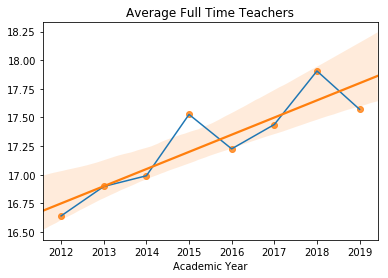

In [19]:
plt.plot(X, FTT_mean)
sns.regplot(X, FTT_mean,)
plt.title("Average Full Time Teachers")
plt.xlabel("Academic Year");

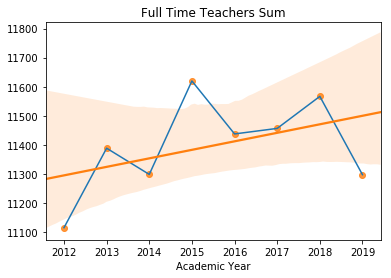

In [20]:
plt.plot(X, FTT_sum)
sns.regplot(X, FTT_sum)
plt.title("Full Time Teachers Sum")
plt.xlabel("Academic Year");

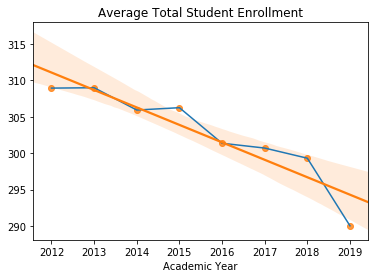

In [21]:
plt.plot(X, TE_mean)
sns.regplot(X, TE_mean)
plt.title("Average Total Student Enrollment")
plt.xlabel("Academic Year");

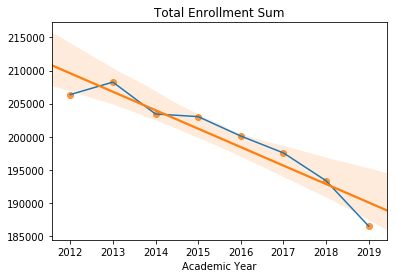

In [22]:
plt.plot(X, TE_sum)
sns.regplot(X, TE_sum)
plt.title("Total Enrollment Sum")
plt.xlabel("Academic Year");

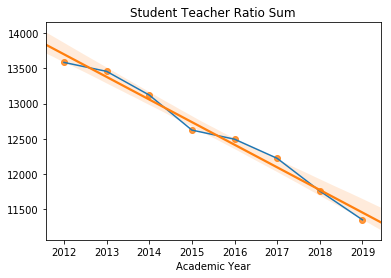

In [23]:
plt.plot(X, STR_sum)
sns.regplot(X, STR_sum)
plt.title("Student Teacher Ratio Sum")
plt.xlabel("Academic Year");

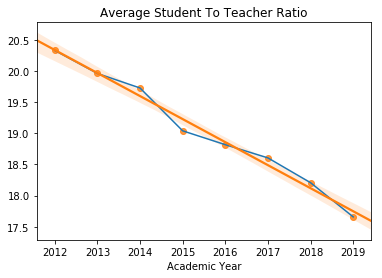

In [24]:
plt.plot(X, STR_mean)
sns.regplot(X, STR_mean)
plt.title("Average Student To Teacher Ratio")
plt.xlabel("Academic Year");

Sampling Full Time Teacher data.

In [25]:
df1213['Full Time Teachers'].describe()

count    674.000000
mean      16.897626
std       16.273934
min        2.000000
25%        9.000000
50%       11.000000
75%       16.000000
max      134.000000
Name: Full Time Teachers, dtype: float64

In [26]:
df1314['Full Time Teachers'].describe()

count    665.000000
mean      16.990977
std       16.232588
min        2.000000
25%        9.000000
50%       11.000000
75%       17.000000
max      141.000000
Name: Full Time Teachers, dtype: float64

In [27]:
df1415['Full Time Teachers'].describe()

count    663.000000
mean      17.526395
std       17.272443
min        2.000000
25%       10.000000
50%       11.000000
75%       17.000000
max      150.000000
Name: Full Time Teachers, dtype: float64